In [80]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

**Mounting Google Drive**

In [81]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzip Data

In [49]:
!unzip -q /content/drive/MyDrive/train.csv.zip
!unzip -q /content/drive/MyDrive/RSNA_Breast_Cancer.zip

replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace 10006_1459541791.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [82]:
train = pd.read_csv('/content/train.csv')

train.head(5)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [83]:
test = pd.read_csv('/content/drive/MyDrive/test.csv')

test.head(5)

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [84]:
train.cancer.value_counts()

0    53548
1     1158
Name: cancer, dtype: int64

**Total Number of Train Dataset**

In [85]:
N = 53548 + 1158
N

54706

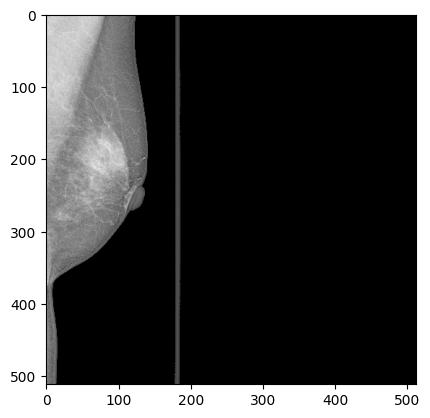

In [86]:
from PIL import Image

im = Image.open('/content/10006_1459541791.png').convert('RGB')
plt.imshow(im)

In [87]:
image_names = ["" for x in range(N)]

train =  train.astype({'patient_id':'str'})
train =  train.astype({'image_id':'str'})

for i in range(len(train.patient_id)):
  a = train.patient_id[i] + "_" + train.image_id[i] + ".png"
  image_names[i] = a

image_names[1]

'10006_1459541791.png'

In [88]:
print('no. of breast images: ', len(image_names))
print('some sample names: ', image_names[0:4])

no. of breast images:  54706
some sample names:  ['10006_462822612.png', '10006_1459541791.png', '10006_1864590858.png', '10006_1874946579.png']


<ipython-input-89-4f0b466d4da2>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


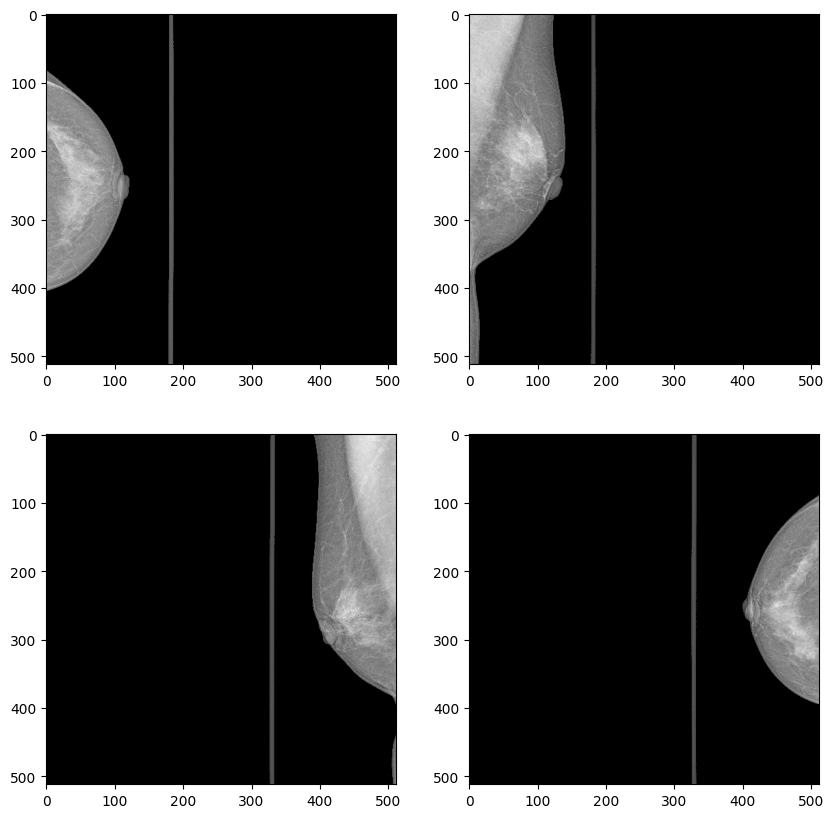

In [89]:
from PIL import Image

im_0 = Image.open('/content/' + image_names[0]).convert('RGB')
im_1 = Image.open('/content/' + image_names[1]).convert('RGB')
im_2 = Image.open('/content/' + image_names[2]).convert('RGB')
im_3 = Image.open('/content/' + image_names[3]).convert('RGB')

im_0 = np.array(im_0)
im_1 = np.array(im_1)
im_2 = np.array(im_2)
im_3 = np.array(im_3)

plt.subplots(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.imshow(im_0)

plt.subplot(2, 2, 2)
plt.imshow(im_1)

plt.subplot(2, 2, 3)
plt.imshow(im_2)

plt.subplot(2, 2, 4)
plt.imshow(im_3)

plt.show()

In [90]:
print('Image dimension: ', im_1.shape)

Image dimension:  (512, 512, 3)


## **Preprocessing**

In [91]:
import os

os.makedirs('/content/Dataset3/', exist_ok = True)
os.makedirs('/content/Dataset2/', exist_ok = True)

os.makedirs('/content/Dataset3/Positive/', exist_ok = True)
os.makedirs('/content/Dataset3/Negative/', exist_ok = True)

os.makedirs('/content/Dataset2/Train/', exist_ok = True)
os.makedirs('/content/Dataset2/Train/Positive/', exist_ok = True)
os.makedirs('/content/Dataset2/Train/Negative/', exist_ok = True)

os.makedirs('/content/Dataset2/Val/', exist_ok = True)
os.makedirs('/content/Dataset2/Val/Positive/', exist_ok = True)
os.makedirs('/content/Dataset2/Val/Negative/', exist_ok = True)

T2----------------------------------------------------------------------

In [60]:
import shutil

for i in range(len(image_names)):
    a = np.random.rand()
    if train.cancer[i] == 1:
        shutil.copy('/content/' + image_names[i],
                    '/content/Dataset3/Positive/' + image_names[i])
    elif ((train.difficult_negative_case[i] == True) and (a<0.5)):
        shutil.copy('/content/' + image_names[i],
                    '/content/Dataset3/Negative/' + image_names[i])

In [61]:
dir_path = '/content/Dataset3/Positive/'
count1 = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count1 += 1
print('File count1:', count1)

dir_path = r'/content/Dataset3/Negative/'
count2 = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count2 += 1
print('File count2:', count2)


File count1: 1534
File count2: 5714


--------------------------------------------

In [92]:
import shutil

for i in range(len(image_names)):
    if train.cancer[i] == 1:
        shutil.copy('/content/' + image_names[i],
                    '/content/Dataset3/Positive/' + image_names[i])
    else:
        shutil.copy('/content/' + image_names[i],
                    '/content/Dataset3/Negative/' + image_names[i])

In [93]:
dir_path = '/content/Dataset3/Positive/'
count1 = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count1 += 1
print('File count1:', count1)

dir_path = r'/content/Dataset3/Negative/'
count2 = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count2 += 1
print('File count2:', count2)


File count1: 1534
File count2: 53548


Data augmention

In [94]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [22]:
negative_dataset_path = '/content/Dataset3/Positive/'
negative_images = os.listdir(negative_dataset_path)

In [23]:
def save_augmented_images(image_path, save_dir, generator, num_augmentations=4):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
    import os

    # Create the save directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Load the input image
    img = load_img(image_path)
    img_array = img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)

    # Save the augmented images
    image_basename = os.path.basename(image_path)
    image_name, image_extension = os.path.splitext(image_basename)

    i = 0
    for batch in generator.flow(img_array, batch_size=16, save_to_dir=save_dir, save_prefix=image_name, save_format='png'):
        i += 1
        if i >= num_augmentations:
            break

In [ ]:
output_directory = '/content/Dataset3/Positive/'

for image in negative_images:
    image_path = os.path.join(negative_dataset_path, image)
    save_augmented_images(image_path, output_directory, datagen, num_augmentations=5)

Creating Y,X test and train

In [95]:
for i in range(count1):
    if i <= 0.8 * count1:
        shutil.copy('/content/' + image_names[i],
                    '/content/Dataset2/Train/Positive/' + image_names[i])
    else:
        shutil.copy('/content/' + image_names[i],
                    '/content/Dataset2/Val/Positive/' + image_names[i])

for i in range(count2):
    if i <= 0.8 * count2:
        shutil.copy('/content/' + image_names[i],
                    '/content/Dataset2/Train/Negative/' + image_names[i])
    else:
        shutil.copy('/content/' + image_names[i],
                    '/content/Dataset2/Val/Negative/' + image_names[i])

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


batch_size = 128
target_size = (150, 150)



train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Dataset2/Train/',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=True,
        class_mode='binary')



validation_generator = test_datagen.flow_from_directory(
        '/content/Dataset2/Val',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False,
        class_mode='binary')

Found 44067 images belonging to 2 classes.
Found 13160 images belonging to 2 classes.


In [99]:
y_train = train_generator.labels
print('Shape of y_train:', y_train.shape)
print(y_train)

Shape of y_train: (44067,)
[0 0 0 ... 1 1 1]


In [98]:
y_val = validation_generator.labels
print('Shape of y_train:', y_val.shape)
print(y_train)

Shape of y_train: (13160,)
[0 0 0 ... 1 1 1]


In [100]:
import numpy as np

y_train = train_generator.labels

num_zeros = np.count_nonzero(y_train == 0)
num_ones = np.count_nonzero(y_train == 1)

print('Number of zeros in y_train:', num_zeros)
print('Number of ones in y_train:', num_ones)

Number of zeros in y_train: 42839
Number of ones in y_train: 1228


In [101]:
import numpy as np

y_val = validation_generator.labels

num_zeros = np.count_nonzero(y_val == 0)
num_ones = np.count_nonzero(y_val == 1)

print('Number of zeros in y_val:', num_zeros)
print('Number of ones in y_val:', num_ones)

Number of zeros in y_val: 12623
Number of ones in y_val: 537


In [102]:
print(y_train)

[0 0 0 ... 1 1 1]


# Model

In [110]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [111]:
inp_layer = Input(shape = (150, 150, 3))

conv1 = Conv2D(filters = 6, kernel_size=(5, 5), strides = (1, 1), padding = 'same', activation='sigmoid')(inp_layer)
maxp1 = MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(conv1)

conv2 = Conv2D(filters = 16, kernel_size=(5, 5), strides = (1, 1), padding = 'valid', activation='sigmoid')(maxp1)
maxp2 = MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(conv2)

flat  = Flatten()(maxp2)
FC1   = Dense(units = 120, activation = 'relu')(flat)
FC2   = Dense(units = 84 , activation = 'relu')(FC1)
output = Dense(units = 1, activation = 'sigmoid')(FC2)

LeNet = Model(inputs = inp_layer, outputs = output)
LeNet.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 6)       456       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 16)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 19600)             0   

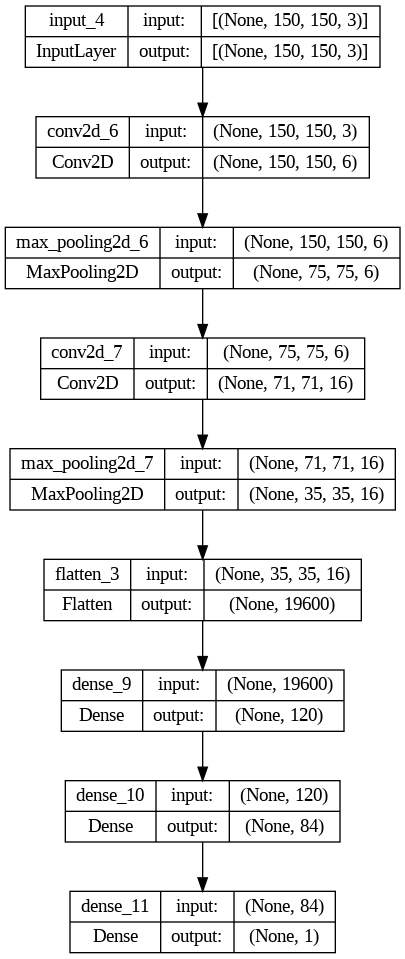

In [112]:
from tensorflow.keras.utils import plot_model
plot_model(LeNet, show_shapes=True)

In [113]:
from tensorflow.keras.metrics import Precision, Recall

In [116]:
opt = Adam(learning_rate=0.1)
loss = binary_crossentropy
LeNet.compile(optimizer=opt, loss = loss, metrics=[Precision(), Recall()])

In [117]:
results = LeNet.fit(train_generator, epochs = 1, validation_data=validation_generator)

 14/345 [>.............................] - ETA: 20:33 - loss: 0.4195 - precision_4: 0.0078 - recall_4: 0.0189

KeyboardInterrupt: ignored

In [75]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test data
y_pred = LeNet.predict_generator(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)
# Get the true labels
y_true = validation_generator.labels
print(y_pred_classes)
# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print("Confusion matrix:")
print(confusion_mtx)


<ipython-input-75-4f2ccd049697>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = LeNet.predict_generator(validation_generator)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Confusion matrix:
[[1914    0]
 [ 537    0]]


<Axes: >

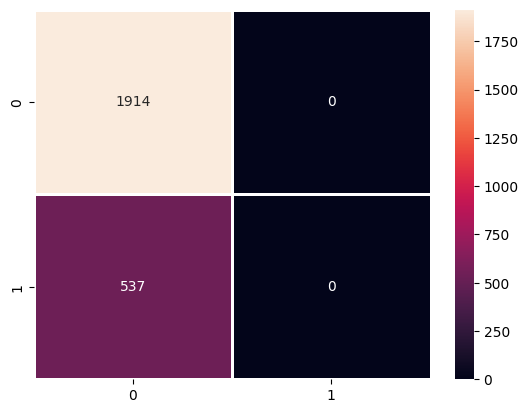

In [77]:
import seaborn as sns
cf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = results.history['loss']
val_loss = results.history['val_loss']
train_acc = results.history['acc']
val_acc = results.history['val_acc']

plt.subplots(figsize=(30, 10))

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('BCE')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

KeyError: ignored

# **Pretrained models**

# VGG16

In [40]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input
import numpy as np
from PIL import Image

In [41]:
feature_extractor = VGG16(weights='imagenet',
                          input_shape=(224, 224, 3),
                          include_top=False)
feature_extractor.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

# Preproccesing

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
target_size = (224, 224)

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Dataset2/Train/',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/Dataset2/Val',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False,
        class_mode='binary')

Found 50018 images belonging to 2 classes.
Found 12503 images belonging to 2 classes.


# Model

In [43]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Flatten

In [44]:
inp_layer = Input(shape = (224, 224, 3))
features = feature_extractor(inp_layer)

flat = Flatten()(features)
FC1 = Dense(units = 300, activation = 'relu')(flat)
FC2 = Dense(units = 200, activation = 'relu')(FC1)
output = Dense(units = 1, activation = 'sigmoid')(FC2)

model = Model(inputs = inp_layer, outputs = output)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 300)               7526700   
                                                                 
 dense_10 (Dense)            (None, 200)               60200     
                                                                 
 dense_11 (Dense)            (None, 1)                 201       
                                                                 
Total params: 22,301,789
Trainable params: 22,301,789
Non-t

In [45]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.001)
BCE = binary_crossentropy
model.compile(optimizer = opt, loss=BCE, metrics = 'acc')

In [46]:
results = model.fit(train_generator, epochs = 1, validation_data=validation_generator)

1564/1564 [==============================] - 679s 422ms/step - loss: 0.4538 - acc: 0.8546 - val_loss: 0.4112 - val_acc: 0.8565


In [47]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test data
y_pred = model.predict_generator(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print("Confusion matrix:")
print(confusion_mtx)
print(classification_report(y_true, y_pred_classes))

<ipython-input-47-d299032b98da>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(validation_generator)


Confusion matrix:
[[10709     0]
 [ 1794     0]]


NameError: ignored

<ipython-input-59-a747a57c5847>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


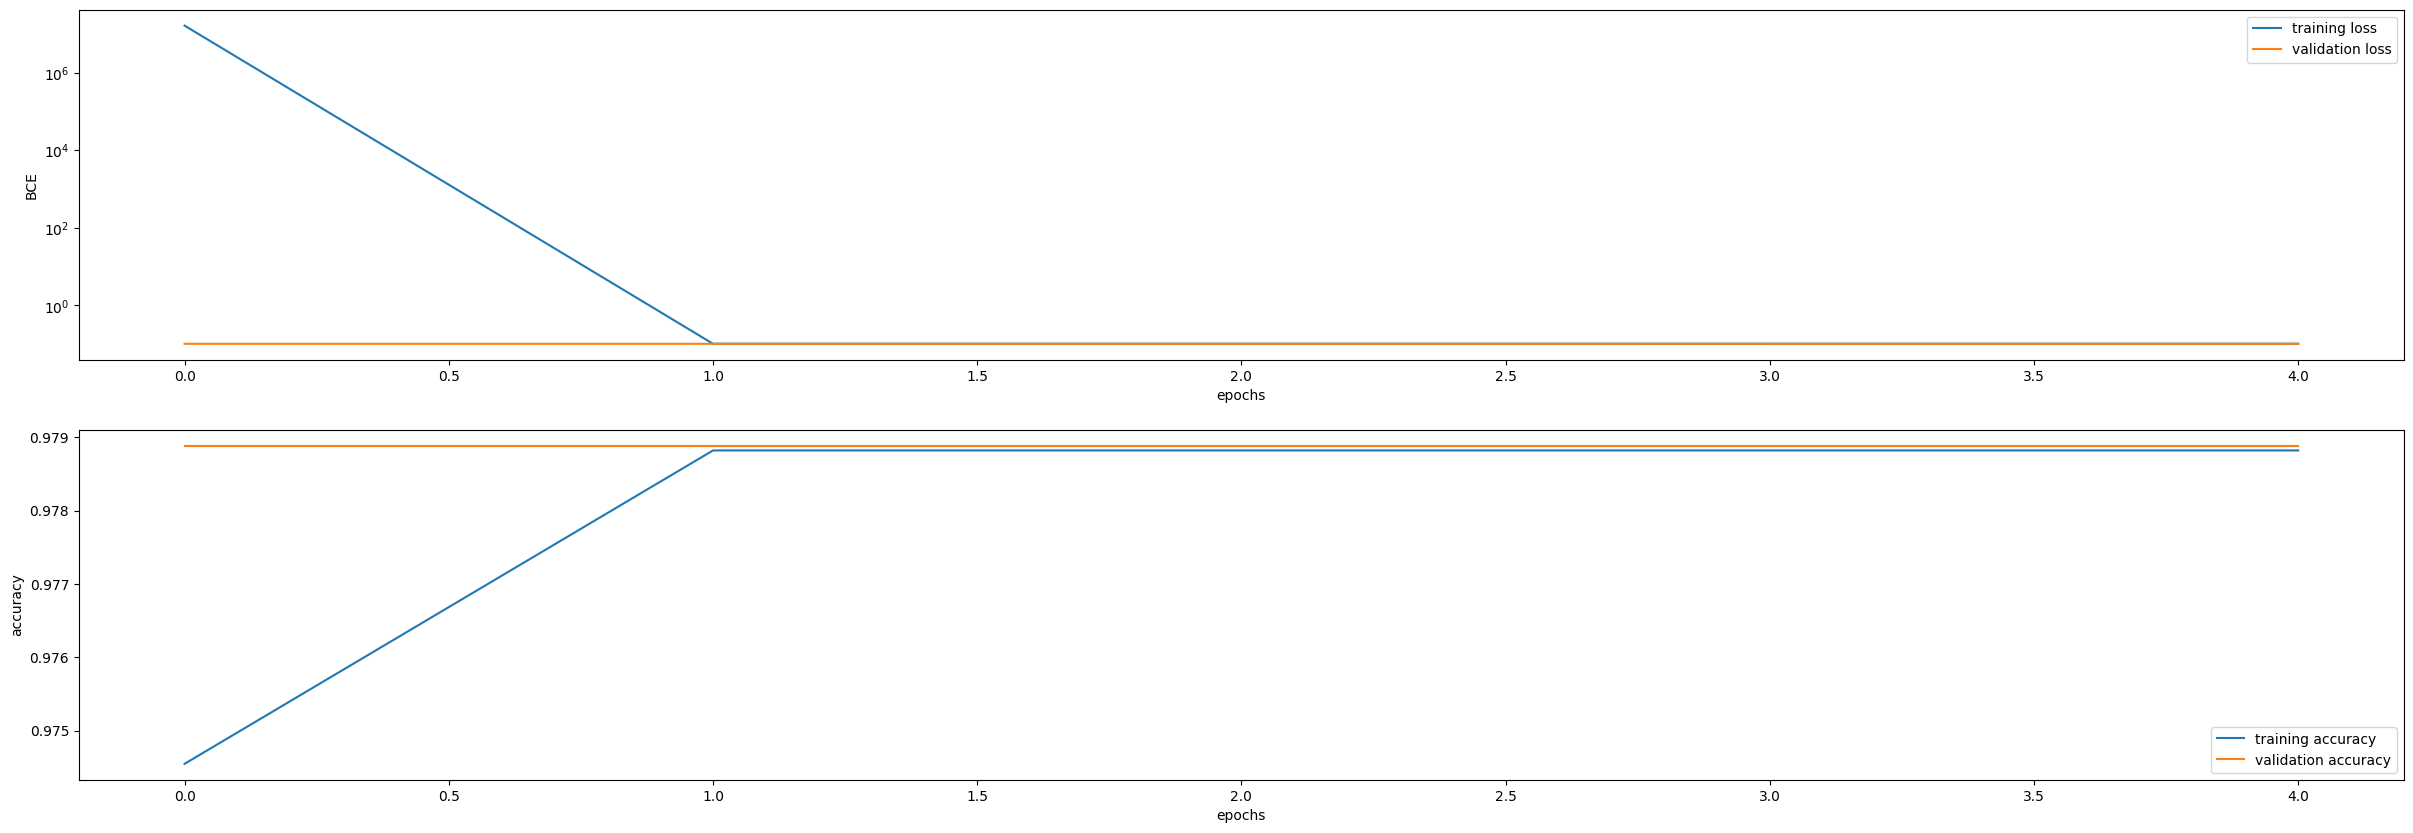

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = results.history['loss']
val_loss = results.history['val_loss']
train_acc = results.history['acc']
val_acc = results.history['val_acc']

plt.subplots(figsize=(30, 10))

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('BCE')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

# **Inception v3**

In [ ]:
from tensorflow.keras.applications.inception_v3  import InceptionV3
from tensorflow.keras.applications.inception_v3  import preprocess_input
from tensorflow.keras.layers import Input
import numpy as np
from PIL import Image

In [ ]:
feature_extractor = InceptionV3(weights='imagenet',
                          input_shape=(229, 229, 3),
                          include_top=False)
feature_extractor.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 229, 229, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 114, 114, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 114, 114, 32  96         ['conv2d_2[0][0]']               
 alization)           

# Preproccesing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
target_size = (229, 229)

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Dataset2/Train/',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/Dataset2/Val',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False,
        class_mode='binary')

Found 43766 images belonging to 2 classes.
Found 10940 images belonging to 2 classes.


# Model

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Flatten

In [ ]:
inp_layer = Input(shape = (229, 229, 3))
features = feature_extractor(inp_layer)

flat = Flatten()(features)
FC1 = Dense(units = 300, activation = 'relu')(flat)
FC2 = Dense(units = 200, activation = 'relu')(FC1)
output = Dense(units = 1, activation = 'sigmoid')(FC2)

model = Model(inputs = inp_layer, outputs = output)

model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 229, 229, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_7 (Flatten)         (None, 51200)             0         
                                                                 
 dense_21 (Dense)            (None, 300)               15360300  
                                                                 
 dense_22 (Dense)            (None, 200)               60200     
                                                                 
 dense_23 (Dense)            (None, 1)                 201       
                                                                 
Total params: 37,223,485
Trainable params: 37,189,053
Non-t

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.001)
BCE = binary_crossentropy
model.compile(optimizer = opt, loss=BCE, metrics = 'acc')

In [ ]:
results = model.fit(train_generator, epochs = 5, validation_data=validation_generator)

Epoch 1/5
1368/1368 [==============================] - 468s 276ms/step - loss: 0.1562 - acc: 0.9781 - val_loss: 0.1139 - val_acc: 0.9789
Epoch 2/5
1368/1368 [==============================] - 369s 270ms/step - loss: 0.1061 - acc: 0.9788 - val_loss: 0.1154 - val_acc: 0.9789
Epoch 3/5
1368/1368 [==============================] - 367s 268ms/step - loss: 0.1062 - acc: 0.9788 - val_loss: 0.1117 - val_acc: 0.9789
Epoch 4/5
1368/1368 [==============================] - 368s 269ms/step - loss: 0.1065 - acc: 0.9788 - val_loss: 0.1139 - val_acc: 0.9789
Epoch 5/5
1368/1368 [==============================] - 363s 265ms/step - loss: 0.1113 - acc: 0.9787 - val_loss: 0.1066 - val_acc: 0.9789


<ipython-input-75-a747a57c5847>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


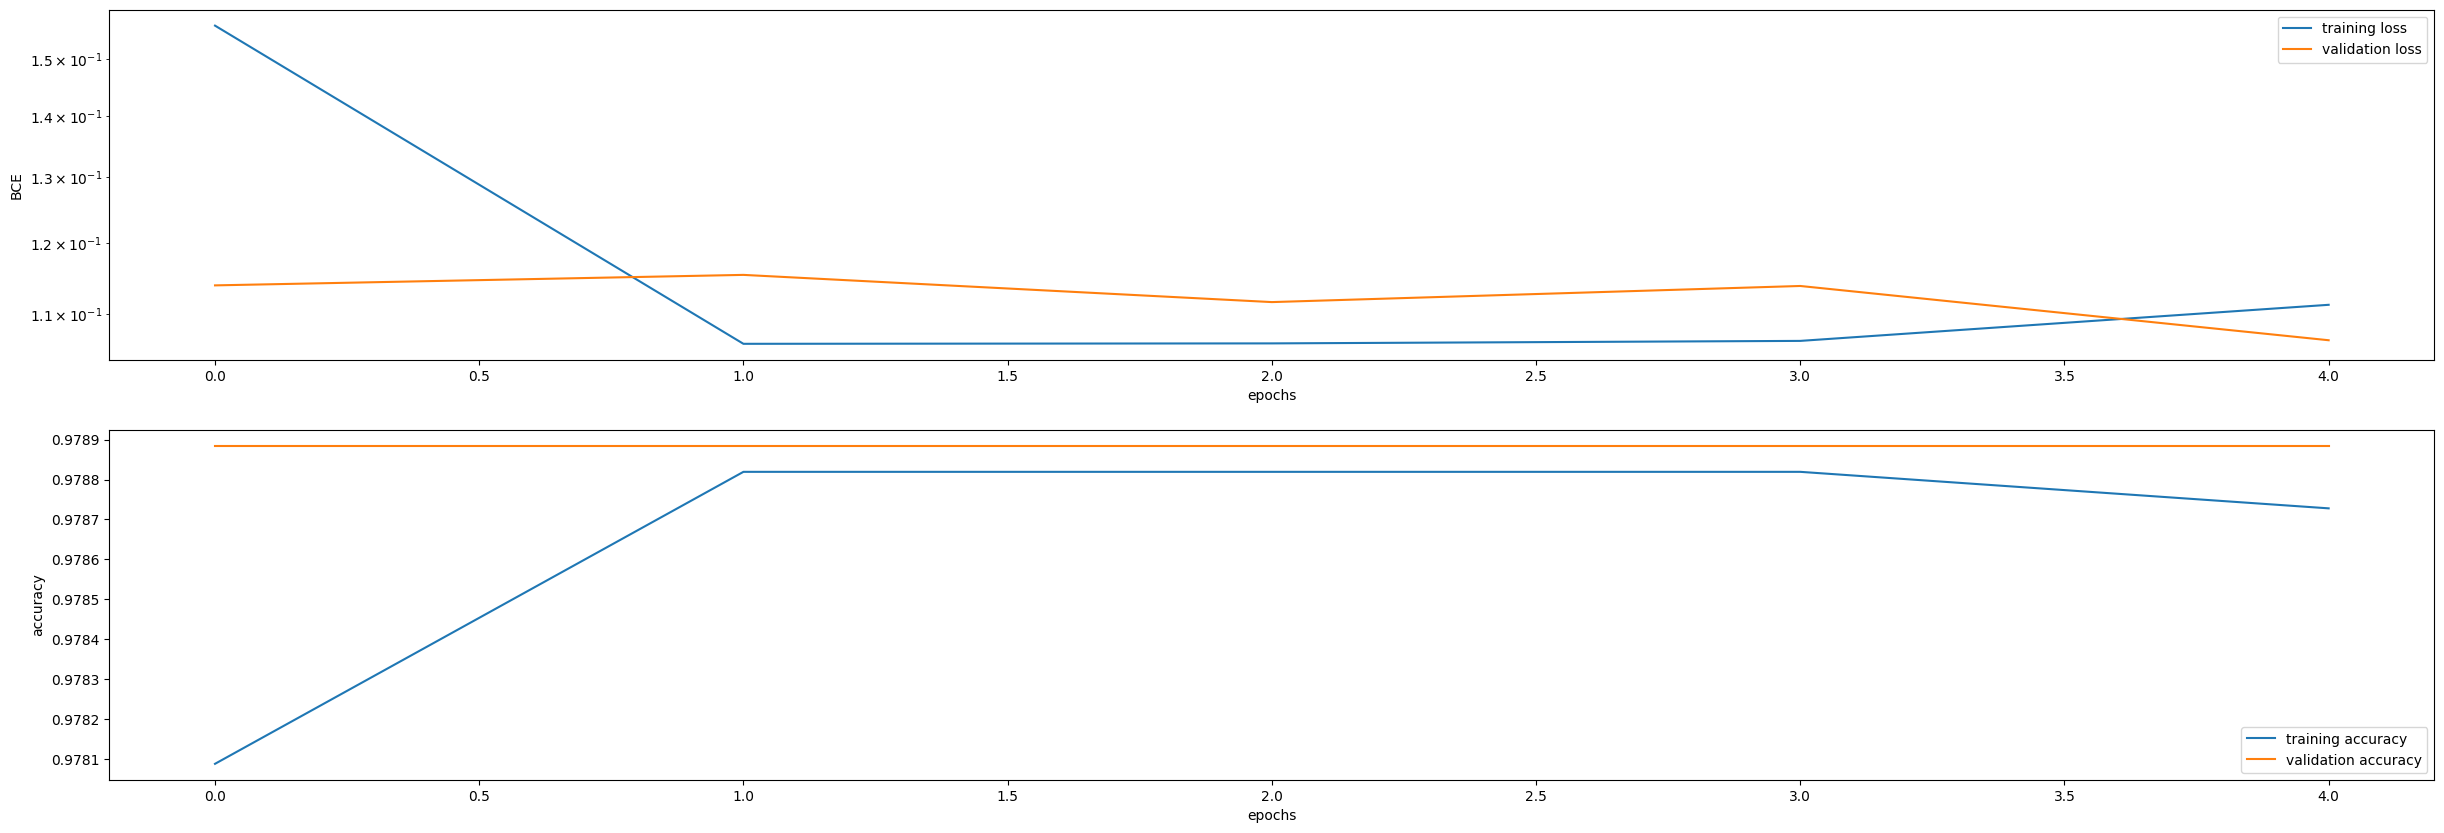

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = results.history['loss']
val_loss = results.history['val_loss']
train_acc = results.history['acc']
val_acc = results.history['val_acc']

plt.subplots(figsize=(30, 10))

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('BCE')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

# ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50  import ResNet50
from tensorflow.keras.applications.resnet50  import preprocess_input
from tensorflow.keras.layers import Input
import numpy as np
from PIL import Image

In [ ]:
feature_extractor = ResNet50(weights='imagenet',
                          input_shape=(224, 224, 3),
                          include_top=False)
feature_extractor.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

# Preproccesing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 128
target_size = (224, 224)

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Dataset2/Train/',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/Dataset2/Val',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False,
        class_mode='binary')

Found 43766 images belonging to 2 classes.
Found 10940 images belonging to 2 classes.


# Model

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Flatten

In [ ]:
inp_layer = Input(shape = (224, 224, 3))
features = feature_extractor(inp_layer)

flat = Flatten()(features)
FC1 = Dense(units = 300, activation = 'relu')(flat)
FC2 = Dense(units = 200, activation = 'relu')(FC1)
output = Dense(units = 1, activation = 'sigmoid')(FC2)

model = Model(inputs = inp_layer, outputs = output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 300)               30105900  
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 53,754,013
Trainable params: 53,700,893
Non-tra

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.001)
BCE = binary_crossentropy
model.compile(optimizer = opt, loss=BCE, metrics = 'acc')

In [ ]:
results = model.fit(train_generator, epochs = 5, validation_data=validation_generator)

Epoch 1/5


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = results.history['loss']
val_loss = results.history['val_loss']
train_acc = results.history['acc']
val_acc = results.history['val_acc']

plt.subplots(figsize=(30, 10))

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('BCE')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

ّFreezing Last 2 layers of best above networks :

In [ ]:
feature_extractor = VGG16(weights='imagenet',
                          input_shape=(224, 224, 3),
                          include_top=False)
feature_extractor.summary()

inp_layer = Input(shape = (224, 224, 3))
features = feature_extractor(inp_layer)

for layer in feature_extractor.layers[:-2]:
    layer.trainable = False


flat = Flatten()(features)
FC1 = Dense(units = 300, activation = 'relu')(flat)
FC2 = Dense(units = 200, activation = 'relu')(FC1)
output = Dense(units = 1, activation = 'sigmoid')(FC2)

model = Model(inputs = inp_layer, outputs = output)

model.summary()

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.001)
BCE = binary_crossentropy
model.compile(optimizer = opt, loss=BCE, metrics = 'acc')
results = model.fit(train_generator, epochs = 1, validation_data=validation_generator)
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = results.history['loss']
val_loss = results.history['val_loss']
train_acc = results.history['acc']
val_acc = results.history['val_acc']

plt.subplots(figsize=(30, 10))

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('BCE')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

freeze 6 layers

In [ ]:
feature_extractor = VGG16(weights='imagenet',
                          input_shape=(224, 224, 3),
                          include_top=False)
feature_extractor.summary()

inp_layer = Input(shape = (224, 224, 3))
features = feature_extractor(inp_layer)

for layer in feature_extractor.layers[:-6]:
    layer.trainable = False


flat = Flatten()(features)
FC1 = Dense(units = 300, activation = 'relu')(flat)
FC2 = Dense(units = 200, activation = 'relu')(FC1)
output = Dense(units = 1, activation = 'sigmoid')(FC2)

model = Model(inputs = inp_layer, outputs = output)

model.summary()

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate = 0.001)
BCE = binary_crossentropy
model.compile(optimizer = opt, loss=BCE, metrics = 'acc')
results = model.fit(train_generator, epochs = 1, validation_data=validation_generator)
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = results.history['loss']
val_loss = results.history['val_loss']
train_acc = results.history['acc']
val_acc = results.history['val_acc']

plt.subplots(figsize=(30, 10))

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('BCE')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()